In [1]:
import pandas as pd
import pickle as pk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1389
           1       1.00      1.00      1.00         9
           3       1.00      0.24      0.38        17
           4       1.00      0.92      0.96        12

    accuracy                           0.99      1427
   macro avg       1.00      0.79      0.83      1427
weighted avg       0.99      0.99      0.99      1427

Accuracy Score: 0.9901892081289418


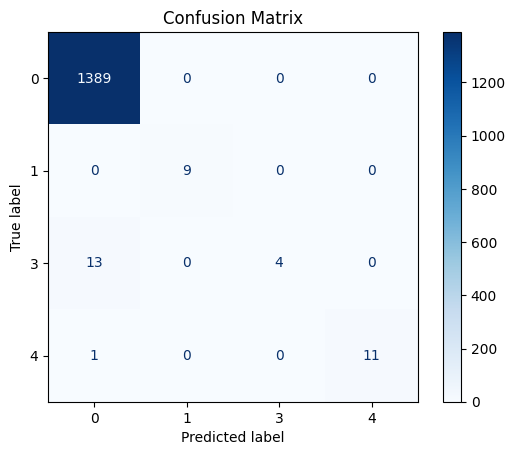

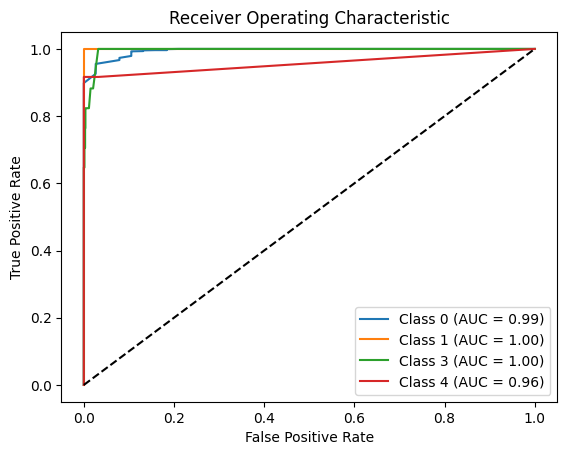

In [2]:
# Load the dataset
data_pose = pd.read_csv(f"./csv_files/poses_data_pose.csv")
features = data_pose.drop(["pose"], axis=1)
target = data_pose[["pose"]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Train the RandomForestClassifier model
data_all_pose_model = RandomForestClassifier()
data_all_pose_model.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to flatten the DataFrame into 1D array

# Predict on the test set
y_pred = data_all_pose_model.predict(X_test)

# Performance Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix, display_labels=data_all_pose_model.classes_)
conf_matrix_disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (For multi-class, this requires one-vs-rest strategy)
# Get the probabilities for the positive class for each class
y_probs = data_all_pose_model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}

for i in range(len(data_all_pose_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == data_all_pose_model.classes_[i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(len(data_all_pose_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {data_all_pose_model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [3]:
pk.dump(data_all_pose_model, open(f"./models/poses.model", "wb"))